# Handwritten Digit Classification

When you deposit a check in an ATM, how does the machine recognize the amount on the check?

<img src="data/check.jpeg" width="400" />

The US Postal Service uses the zip code to sort mail automatically. How does it recognize the zip code on the envelope?

<img src="data/envelope.png" width="400" />

One of the early successes of machine learning was solving this problem of handwritten digit classification.

In this notebook, you will train a machine learning model on the same MNIST data set. This dataset is an example of **image data**.

## Exercise 0

The training data is available at https://datasci112.stanford.edu/data/mnist/train.csv. Read in this training data.

How are the digits represented? What is each row? What are the columns?

In [1]:
! cd data && wget https://datasci112.stanford.edu/data/mnist/train.csv

import pandas as pd

df = pd.read_csv("data/train.csv")
df

--2025-08-17 17:46:52--  https://datasci112.stanford.edu/data/mnist/train.csv
Resolving datasci112.stanford.edu (datasci112.stanford.edu)... 54.81.116.232
Connecting to datasci112.stanford.edu (datasci112.stanford.edu)|54.81.116.232|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://web.stanford.edu/class/datasci112//data/mnist/train.csv [following]
--2025-08-17 17:46:53--  https://web.stanford.edu/class/datasci112//data/mnist/train.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9146017 (8.7M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]   8.72M   760KB/s    in 14s     

2025-08-17 17:47:09 (638 KB/s) - ‘train.csv’ saved [9146017/9146017]



,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


Let's view image 0 in this data set. To do this, we need to grab the 784 pixels and reshape it to a $28 \times 28$ image.

- You can reshape a Pandas `Series` to a 2D array by calling `Series.values.reshape(nrow, ncol)`.
- You can view a 2D array as an image using the function `plt.imshow()`. (If you want to view the image on the original grayscale, specify `cmap="gray"`. The available colormaps are listed [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).)

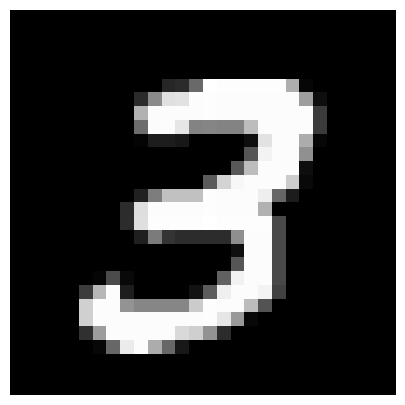

In [ ]:
import matplotlib.pyplot as plt

# drop the class column
df_image = df.drop(labels="class", axis=1)

plt.figure(figsize=(10, 5))
plt.imshow(df_image.iloc[0, :].values.reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

## Exercise 1

Train a 10-nearest neighbors model to predict the digit. (You do not need to scale the features because they are already on roughly the same scale.)

What is the training accuracy?

In [ ]:
# create the 10-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

X_train = df_image.values
y_train = df["class"].values

classifier = KNeighborsClassifier(n_neighbors=10, metric="euclidean")

classifier.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [ ]:
# cross-validation for the classifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train, cv=10)
scores.mean()
# training accuracy: 0.92

np.float64(0.9274000000000001)

## Exercise 2

Make a confusion matrix of the training predictions. Which two digits are most frequently confused?

Display a couple of the misclassified digits. Can you see why they were misclassified?

## 📊 혼동 행렬 (Confusion Matrix) by Copilot

혼동 행렬은 분류 모델의 성능을 평가하기 위한 표로, 모델의 예측 결과와 실제 값을 비교하여 어떤 종류의 오류가 발생했는지를 시각적으로 보여줍니다.

### 🔹 구성 요소
|실제 / 예측	 |Positive 예측	 |Negative 예측           |  
|---------------|-------------------|-------------------|
|실제 Positive	 |TP (True Positive) |FN (False Negative)|
|실제 Negative	 |FP (False Positive)|TN (True Negative)  |

- **TP (True Positive):** 실제도 Positive, 예측도 Positive
- **TN (True Negative):** 실제도 Negative, 예측도 Negative
- **FP (False Positive):** 실제는 Negative, 예측은 Positive (1종 오류)
- **FN (False Negative):** 실제는 Positive, 예측은 Negative (2종 오류)

### 📐 주요 평가 지표
- **정확도 (Accuracy)**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **정밀도 (Precision)** 

$$ 
\text{Precision} = \frac{TP}{TP + FP}
$$

- **재현율 (Recall)** 

$$ 
\text{Recall} = \frac{TP}{TP + FN} 
$$

- **F1 점수 (F1-Score)**

$$ 
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} 
$$

- **특이도 (Specificity)** 

$$
 \text{Specificity} = \frac{TN}{TN + FP} 
$$

### 🐶 예시: 강아지 이미지 분류

|               | 예측: 강아지 | 예측: 강아지 아님 |
|---------------|--------------|-------------------|
| 실제: 강아지   | TP           | FN                |
| 실제: 강아지 아님 | FP           | TN                |

### 📌 참고

혼동 행렬은 특히 클래스 불균형이 있는 데이터셋에서 모델의 성능을 더 정확히 평가할 수 있는 도구입니다. 정확도 외에도 정밀도, 재현율, F1 점수 등을 함께 고려해야 합니다.


## Exercise 3

Determine the optimal value of $k$ in terms of accuracy.

## Exercise 4

Read in the test data, available at https://datasci112.stanford.edu/data/mnist/test.csv.

Use the best model from Exercise 3 to classify these digits. How would you check these predictions?